# **Analisis Sentimen Terkait ‘Dirty Vote’ pada Pemilu**
Selamat datang dalam proyek Analisis Sentimen Terkait ‘Dirty Vote’ pada Pemilu! Dalam era digital saat ini, media sosial menjadi wadah utama bagi masyarakat untuk menyuarakan opini mereka, termasuk dalam konteks politik. Dalam proyek ini, kita akan mengeksplorasi bagaimana sentimen publik terhadap isu ‘Dirty Vote’ dalam pemilu dapat dianalisis secara otomatis menggunakan teknik pemrosesan bahasa alami (NLP).

Analisis sentimen adalah cabang penting dalam machine learning yang memungkinkan kita mengklasifikasikan opini publik menjadi sentimen positif, netral, atau negatif. Dengan melakukan analisis ini, kita dapat memahami persepsi masyarakat terkait dugaan kecurangan pemilu dan bagaimana isu ini memengaruhi diskusi di berbagai platform media sosial.

Dalam proyek ini, kita akan menerapkan beberapa pendekatan berbeda, termasuk LSTM, GRU dengan TF-IDF, serta kombinasi CNN dan LSTM, untuk menentukan model mana yang paling efektif dalam memprediksi sentimen. Data yang digunakan berasal dari berbagai sumber seperti Twitter dan YouTube, yang akan diproses melalui teknik web scraping dan text preprocessing sebelum dianalisis menggunakan model deep learning berbasis TensorFlow.

Melalui proyek ini, kita akan memperoleh wawasan mendalam tentang bagaimana kecerdasan buatan dapat digunakan untuk memahami pola opini publik secara lebih akurat. Selain itu, proyek ini juga akan meningkatkan keterampilan dalam pengolahan teks, ekstraksi fitur, serta implementasi model machine learning untuk analisis sentimen.

Mari kita mulai perjalanan ini dan mengungkap bagaimana opini masyarakat terbentuk dalam diskusi terkait pemilu dan dugaan kecurangan dalam proses demokrasi

In [ ]:

!pip install emoji
!pip install swifter
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=81afdd5075cda2dca01524940c60256a9361c39f9619dfa6d5fed9d0e04fa5c1
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.9 MB/s eta 0:00:00


# **Import Library**

In [ ]:
import pandas as pd
import re
import string
import nltk
import emoji
import swifter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Download resource NLTK (jika belum)
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')

# Inisialisasi Sastrawi Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Load dataset
df = pd.read_csv("Dirty_vote.csv")

# Stopwords bahasa Indonesia
stop_words = set(stopwords.words("indonesian"))




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# **Prepocessing**

In [ ]:
# Tambahkan kata-kata yang ingin dihapus
custom_stopwords = {"yg", "nya", "gak", "aja", "href", "ga", "ya","br"}

# Kata yang ingin diganti
word_replacement = {
    "milu": "pemilu"
}


# Fungsi untuk membersihkan teks
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Konversi ke huruf kecil
        text = re.sub(r"http\S+|www\S+", "", text)  # Hapus link
        text = re.sub(r"&\w+;", "", text)  # Hapus karakter HTML
        text = re.sub(r"<.*?>", "", text)  # Hapus tag HTML
        text = re.sub(r"[^\w\s]", "", text)  # Hapus tanda baca
        text = re.sub(r"\s+", " ", text).strip()  # Hapus spasi berlebih
        text = re.sub(r"\d+", "", text)  # Hapus angka
        text = re.sub(r"([!?.])\1+", r"\1", text)  # Hapus tanda baca berulang

        # Hapus emoji
        text = emoji.replace_emoji(text, replace="")

        # Tokenisasi
        words = word_tokenize(text)

        # Stopword removal (termasuk custom stopwords)
        words = [word for word in words if word not in stop_words and word not in custom_stopwords]

        # Ganti kata-kata tertentu
        words = [word_replacement.get(word, word) for word in words]

        # Stemming menggunakan Sastrawi
        words = [stemmer.stem(word) for word in words]

        return " ".join(words)
    return ""


In [ ]:
df["Cleaned_Comment"] = df["Comment"].swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/10500 [00:00<?, ?it/s]

# **Pelabelan**

In [ ]:
# Kamus Sentimen (bisa diperluas)
kamus_positif = set([ "jujur", "adil", "demokrasi", "transparan", "bersih", "berintegritas", "kritis",
    "objektif", "independen", "keadilan", "reformasi", "suara rakyat", "perubahan",
    "inspiratif", "bijak", "sejahtera", "kompeten", "visioner", "berani", "legal",
    "dapat dipercaya", "reformasi", "tanggung jawab", "inovatif", "mencerahkan",
    "mewujudkan reformasi", "menegakkan hukum", "menginformasikan publik", "presiden",
    "bangga", "hebat", "bagus", "mantap", "bismillah", "doa", "peduli", "generasi","juang", "terimakasih", "fakta", "data", "bersyukur", "melek politik",
    "edukatif", "informatif", "berani", "cinta negeri", "halo", "sehat",
    "pilih cerdas", "semangat", "jalan keluar", "benar", "berkah", "berbagi", "selamat", "percaya", "harapan", "bersyukur", "bijak", "baik", "benar", "saluttt",
    "mantap", "melek", "jujur", "adil", "cinta", "berani", "merdeka", "sehat", "terang",
    "pintar", "cerdas", "bijaksana", "hebat", "bangga", "inspirasi", "luar biasa","keren", "bagus", "mantap", "semangat", "hebat", "adil", "jujur",
    "cerdas", "pintar", "netral", "menang", "sukses", "benar", "bukitikan",
    "dukungan", "rakyat cerdas", "kualitas", "bobot", "pro rakyat", "satu NKRI",
    "fair", "terima kasih", "alhamdulillah", "pelajaran", "sejarah", "cerdas", "mandiri", "berpikir", "maju", "jasa", "kerja keras",
    "pro rakyat", "hidup akal", "sejarah", "stop bikin pecah belah",
    "satu nkri", "berfikir", "milenial","cerdas", "semangat", "amanah", "adil", "melek", "peduli", "jujur", "bangkit", "berkah",
    "berani", "pro rakyat", "satu NKRI", "maju", "solid", "indonesia berkembang", "harapan",
    "sejahtera", "demokrasi sehat", "bantu rakyat", "mantap", "dukungan", "doa", "berjuang","menang", "jaya", "semangat", "harapan", "adil", "jujur", "cerdas", "maju", "berkembang", "garuda",
    "bangga", "kebanggaan", "mantap", "hebat", "bagus", "sukses", "damai", "optimis","cerdas", "sehat", "semangat", "bukti", "pimpin pro rakyat", "satu nkri",
    "makbantenh", "millenial", "generasi", "prof", "masuk nalar", "prabowo jaya",
    "ayuk satu nkri", "hidup akal", "berbeda", "gila halal", "ok gas", "cepat lantik",
    "feri amsari", "tonton film", "ingat", "temu jalan","salutt",
    "hidup prabowoo",
    "hidup jokowii",
    "prabowo putar bos",
    "cepat lantik prabowo",
    "film dokumenter",
    "viewer bagus",
    "bpk acara belah debat",
    "serah jls prabowo",
    "rakyat pilih bangun indonesia",
    "mufakat",
    "menang murni pilih rakyat",
    "proses demokrasi",
    "bikin fillem brjayalah negaraku",
    "prabowo menang",
    "jokowi main cantik",
    "berdemokrasi",
    "fair donk","film bukti nyata", "mau bangun indonesia", "serius nanya",
    "viewer bagus", "pinter bicara", "bpk acara",    "lucu",
    "moga indonesia",
    "mending film sexy killer kena wkwkwkwkwk",
    "ter indonesia",
    "serius nanya film adegan actionnya",
    "film ngaruh dukung",
    "film ngaruh",
    "film presentasi ppt",
    "film bos",
    "film lawak",
    "gua suka banget nonton film gua pilih",
    "mending nonton film suka ganjar",
    "film season rilis artis dada",
    "film bagus",
    "hibur film",
    "good job",
    "film buka tabir",
    "film box office",
    "erti bahwasannya politik instrument penting",
    "musti banyak kaya gin",
    "terima kasih bro",
    "terima kasih dirty vote",
    "respect",
    "keren dirty vote",
    "film berfaeda",
    "jokowi bagus",
    "masya alloh tabarakallah",
    "mudah mudah lindung allh swt",
    "berkat vidio dukung prabowo",
    "terimakasih dirty vote",
    "moga sadar politik luas",
    "film nihngantukk",
    "juara",
    "wahh",
    "dapat film bawa menang rakyat",
    "save bahan renung milu"])
kamus_negatif = set(["curang","anak abah" "manipulasi", "intimidasi", "politik uang", "nepotisme", "korupsi",
    "penyalahgunaan", "dinasti", "pencitraan", "bohong", "propaganda", "memihak",
    "rekayasa", "manipulatif","tai", "tidak netral", "settingan", "dusta", "licik",
    "penyesatan opini", "menyesatkan", "pembohongan publik", "fitnah", "ga ngaruh",
    "munafik", "tukang fitnah", "kerja kelompok", "black campaign", "tidak adil",
    "abusif", "otoriter", "tidak demokratis", "penipuan", "provokasi", "konflik kepentingan",
    "kejahatan", "sampah", "buzzer", "hoax", "gagal", "rusak", "anjing", "ancaman", "persekusi",
    "provokator", "inkonsisten", "penggelapan suara", "pencucian otak", "pemalsuan",
    "pemutarbalikan fakta", "rekayasa opini", "tipu daya", "dagelan", "drama politik","acak-acak", "miskin", "kesel", "dirty", "prank", "rusuh", "bego", "brutal",
    "otak udang", "hapus", "susah", "goblok", "tai", "muak", "naif", "kampaign hitam",
    "nggak ngaruh", "ngejatuhin", "capek", "dinasti", "kezhaliman", "blas", "maksa",
    "tunduk", "tirani", "rakyat sengsara", "pelihara kemiskinan", "buta politik",
    "rakyat tetap tolol", "ilusi", "eksistensi parpol rusak","taeee", "assueee", "dirty", "keok", "bego", "otak udang", "kalah", "bacotttt",
    "black campaign", "tai", "ampas", "sampah", "ngak guna", "mampus", "pecah belah",
    "dagel", "brengsek", "brengsek", "jebakan", "konyol", "kocak", "konspirasi",
    "manipulasi", "gila", "brengsek", "nggak ngaruh", "sia-sia", "brengsek", "dagelan","kerja kelompok","bego", "bodoh", "munafik", "hoax", "tai", "jelek", "sampah", "ngak guna",
    "gblg", "pemilu curang", "politik bego", "hina", "malu", "rusak demokrasi",
    "black campaign", "distopia", "tirani", "miskin", "buta politik", "nepotisme",
    "sengsara", "ugalu-galan", "pelihara kebodohan", "harga barang naik",
    "opung parbellak ngomong", "rugi bandar","bego", "politik bego", "otak udang", "ngak guna", "tai", "sampah", "tai sampah",
    "jijik", "hoak", "kontollll", "pemirsaaa", "goblokkkkk", "pecah belah",
    "mutu", "black campaign", "bohong", "kecewa", "kecurangan", "propaganda",
    "jatuh", "diskredit", "maksa", "bancaan", "tendensius", "sinetron","dirty", "sampah", "tai", "nggak guna", "ngefek", "hina", "pecah belah",
    "krps", "korupsi", "curang", "anomaly", "politik bego", "otak udang",
    "mampus", "ngehabisin", "benci", "dust", "black campaign", "tooblol","sampah", "tai", "goblok", "bodoh", "laknat", "busuk", "pecah belah", "hina", "prihatin",
    "jilat", "mampus", "bego", "sia-sia", "politik kotor", "kejang",
    "rem", "survai", "palsu", "bubrah", "hancur", "pemilu curang", "dirty vote",
    "politik bego", "mangkel", "kasian", "provokasi", "nipu", "pencitraan", '1 putaran', "sampah", "goblok", "tai", "pecah belah", "politik bego", "otak udang", "hina", "curang", "mampus", "kotor", "bodoh", "parah", "menyesal", "kecewa", "sengkuni", "busuk", "bego", "mampus", "tai", "sampah", "hina", "pecah belah", "dust", "black campaign",
    "bacot", "ndak guna", "otak udang", "politik bego", "kejang", "cocok teater",
    "peran gelandang politik", "jangan pecah belah", "jokowi voc", "indo perang saudara",
    "brkabur", "dirty vote", "lobi", "wowo", "ketawain voter", "efisiensi anggar",
    "ngadalin", "usak konstitusi", "politik bego",
    "otak udang",
    "film taisampahngak guna",
    "film tai peran gelandang politik",
    "kontoll",
    "goblokk",
    "film lawak",
    "mampus klen",
    "bego",
    "pecah belah",
    "gila sistem demokrasi",
    "intimidasi",
    "sakit hati",
    "buka aib",
    "gagal",
    "fitnah",
    "ngantuk","taee", "assuee", "geleng geleng kepala", "politik bego", "otak udang",
    "black campaign", "politik indonesia yah gilaa", "film taisampahngak guna",
    "film tai", "mampus klen", "hidup akal mati iman", "pecah belah rakyat",
    "curang", "politik halal", "dirty vote", "buka aib", "sakit hati",
    "gila sistem demokrasi", "pemimpin buruk", "nyungsepp", "bacoot","belah", "pecah belah", "taik",
    "sampah", "black campaign", "politik indonesia yah gilaa", "mampus", "curang",
    "taekk", "film goblok", "sakit hati", "gila sistem demokrasi", "buruk","hasut", "rugi bandar",
    "taisampah",
    "tai",
    "mampus",
    "taik",
    "goblok",
    "sakit hati",
    "akal bulus",
    "curang",
    "jancuk",
    "onar",
    "pecah nkri",
    "halah taii",
    "kontol",
    "jembutt",
    "framing tolol",
    "sia sia",
    "kntl",
    "blunder",
    "tumpur",
    "baom",
    "busuk",
    "dungu",
    "pecah bela negara",
    "otak korslet",
    "kadrun",
    "nyungsep",
    "culas",
    "provokatif",
    "jeblok","isinya anak abah",
    "sadis",
    "bodoh",
    "cupapi munyenyo","tolol","pelanggar konstitusi"])






In [ ]:
def classify_text(text):
    text = text.lower()  # Ubah teks ke huruf kecil agar pencocokan tidak case-sensitive

    # Cek kata negatif
    for word in kamus_negatif:
        if re.search(r'\b' + re.escape(word) + r'\b', text):
            return "negatif"

    # Cek kata positif
    for word in kamus_positif:
        if re.search(r'\b' + re.escape(word) + r'\b', text):
            return "positif"

    return "netral"

In [ ]:
# Terapkan fungsi sentimen
df["sentiment"] = df["Cleaned_Comment"].apply(classify_text)



In [ ]:
# Hitung distribusi kelas sentimen
sentiment_counts = df["sentiment"].value_counts()

# Tampilkan hasil
print(sentiment_counts)


sentiment
netral     4396
negatif    3508
positif    2596
Name: count, dtype: int64


In [ ]:
# Hitung distribusi kelas sentimen
sentiment_counts = df["sentiment"].value_counts()

# Tampilkan hasil
print(sentiment_counts)


sentiment
negatif    1178
netral     1098
positif     724
Name: count, dtype: int64


In [ ]:
# Ambil contoh komentar Netral setelah perbaikan
neutral_comments = df[df["sentiment"] == "positif"]["Cleaned_Comment"].head(5)
print(neutral_comments.to_list())

['bener bener nyata karna presiden bilang menang bantu mulyono', 'kesini semat komentar hidup jokowihidup jokowi presiden pilih', 'nonton film keren liat bijak perintah', 'jawab fakta akhirakhir shubhaanallaah', 'umur juang']


In [ ]:
texts = [
"terimakasih andacukup berani mengangkat topik ini"
]

for text in texts:
    print(f'"{text}" -> {classify_text(text)}')

"terimakasih andacukup berani mengangkat topik ini" -> positif


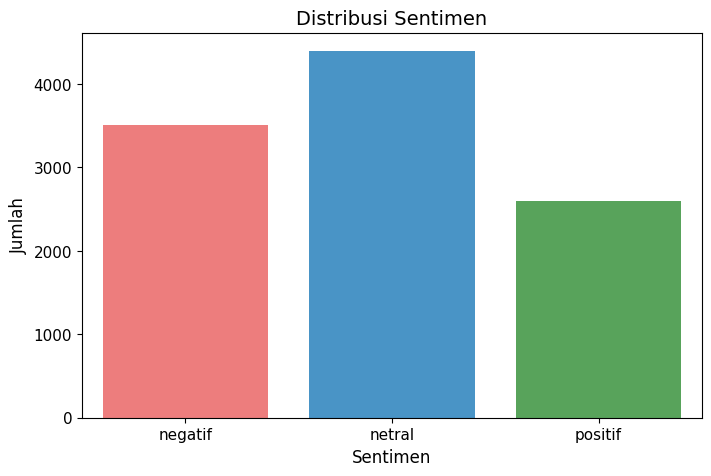

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
# Warna khusus untuk setiap sentimen
sentiment_colors = {"negatif": "#FF6B6B", "positif": "#4CAF50", "netral": "#3498DB"}

plt.figure(figsize=(8, 5))
sns.countplot(x=df["sentiment"], palette=sentiment_colors, order=["negatif", "netral", "positif"])
plt.title("Distribusi Sentimen", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()


In [ ]:
# Ambil contoh komentar Netral setelah perbaikan
neutral_comments = df[df["sentiment"] == "negatif"]["Cleaned_Comment"].head(50)
print(neutral_comments.to_list())

['film isi sampah', 'film provokator buruk', 'indonesia hebat sekalibahkan tarung curang terjadifilm opini sampah', 'taeee assueee', 'geleng geleng kepala gw liat situasi negara', 'nonton video mayan hibur rada kesel dikit liat kondisi negara', 'pidato prabowo rapimnas partai gerinda bukti benar dirty vote', 'selamat ulang dirty vote film ubah pandang orang proses demokrasi negeri percaya harap tumbuh negeri runtuh', 'si wowo lantik gw ketawain voter antri gas kena phk efisiensi anggar', 'dirty vote cocok kanal demokrasi isi orang kompeten bidang sbagai ajar public senyap', 'rahasia orang mai orang partisan sulit ngadalin orang', 'udah capek bikin film eh keok jagoanya', 'film bikin keok anis ganjar', 'milih tuju usak konstitusi', 'martir gagal', 'jokowi makan bakso nikmat damai pensiun plus tunjang jtbln hahaha dagel', 'alat gagal total gera rakyathahahaha', 'omong kena prank', 'kasi deh jokowi kalo pdi malu ntr gilir anies gituin pdi', 'film bukti nyata orang gblg pilih sensor', 'agu

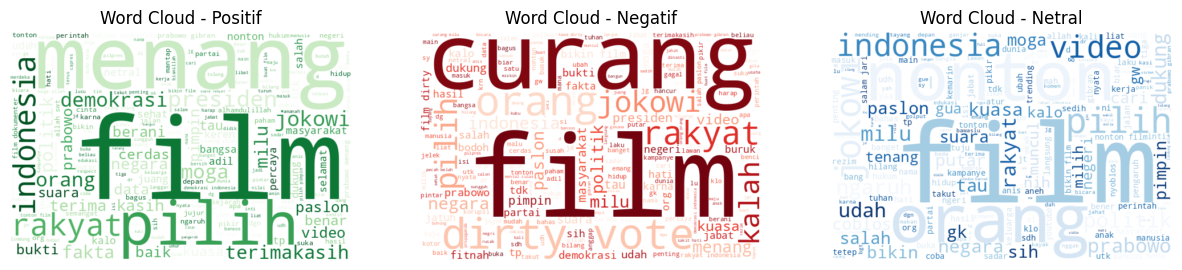

In [ ]:
from wordcloud import WordCloud
from collections import Counter
# Pisahkan teks berdasarkan sentimen
text_positive = " ".join(df[df["sentiment"] == "positif"]["Cleaned_Comment"])
text_negative = " ".join(df[df["sentiment"] == "negatif"]["Cleaned_Comment"])
text_neutral = " ".join(df[df["sentiment"] == "netral"]["Cleaned_Comment"])

# Buat word cloud
wc_positive = WordCloud(width=600, height=400, background_color="white", colormap="Greens").generate(text_positive)
wc_negative = WordCloud(width=600, height=400, background_color="white", colormap="Reds").generate(text_negative)
wc_neutral = WordCloud(width=600, height=400, background_color="white", colormap="Blues").generate(text_neutral)

# Tampilkan word cloud
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.imshow(wc_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positif")

plt.subplot(1, 3, 2)
plt.imshow(wc_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negatif")

plt.subplot(1, 3, 3)
plt.imshow(wc_neutral, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Netral")

plt.show()


[('film', 2954), ('indonesia', 1224), ('orang', 1170), ('rakyat', 1087), ('pilih', 990), ('jokowi', 803), ('milu', 783), ('menang', 765), ('politik', 722), ('curang', 705), ('negara', 690), ('prabowo', 676), ('dirty', 668), ('paslon', 664), ('moga', 588), ('presiden', 579), ('vote', 568), ('kalah', 536), ('suara', 534), ('demokrasi', 527)]


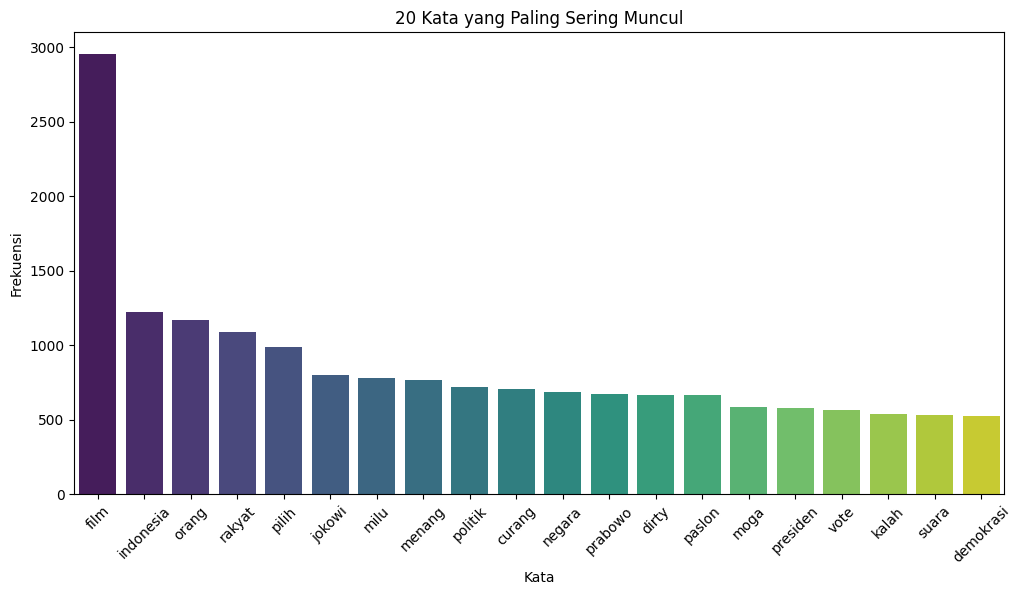

In [ ]:
# Gabungkan semua teks
all_words = " ".join(df["Cleaned_Comment"]).split()

# Hitung frekuensi kata
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)  # Ambil 20 kata paling sering

# Pisahkan kata dan jumlah kemunculannya
words, counts = zip(*common_words)


print(common_words)
# Plot frekuensi kata
plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("20 Kata yang Paling Sering Muncul")
plt.show()


In [ ]:
df.to_csv("Label_sentiment.csv", index=False, encoding="utf-8")

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


# **Pembuatan Model**

In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Bidirectional, Reshape
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam

# Set random seed
tf.random.set_seed(42)

In [7]:
# Load dataset
df = pd.read_csv("Label_sentiment.csv")
df.dropna(inplace=True)


In [12]:
# Encode label
label_encoder = LabelEncoder()
df["sentiment"] = label_encoder.fit_transform(df["sentiment"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["Cleaned_Comment"], df["sentiment"], test_size=0.2, stratify=df["sentiment"], random_state=42)
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Tokenization
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Apply tokenization and padding to X_train and X_test
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100, padding='post', truncating='post')
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100, padding='post', truncating='post')

In [13]:
# Callback untuk berhenti jika akurasi mencapai 95%
class StopAtAccuracy(Callback):
    def __init__(self, target_accuracy=0.95):
        super(StopAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_acc = logs.get("val_accuracy")
        if val_acc is not None and val_acc >= self.target_accuracy:
            print(f"\nStopping training as val_accuracy reached {val_acc:.4f} (≥ {self.target_accuracy})")
            self.model.stop_training = True

## **Skema 1 Bi-LSTM	Tokenizer + Embedding Layer**


In [14]:

# Model LSTM
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(3, activation="softmax")
])

early_stop_custom = StopAtAccuracy(target_accuracy=0.95)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
# Compile Model
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=["accuracy"])

# Training Model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop_custom])

Epoch 1/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 62s 110ms/step - accuracy: 0.5629 - loss: 0.9221 - val_accuracy: 0.9108 - val_loss: 0.2826
Epoch 2/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9393 - loss: 0.2094
Stopping training as val_accuracy reached 0.9522 (≥ 0.95)
513/513 ━━━━━━━━━━━━━━━━━━━━ 76s 99ms/step - accuracy: 0.9394 - loss: 0.2093 - val_accuracy: 0.9522 - val_loss: 0.1762


In [16]:

# Evaluasi Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9567 - loss: 0.1586

Test Accuracy: 95.22%


## **Skema 2 GRU + TF-IDF**

In [36]:
# Konversi X_train dan X_test menjadi list of strings jika masih berbentuk array
X_train_text = list(map(str, X_train))  # Pastikan semua elemen dalam bentuk string
X_test_text = list(map(str, X_test))

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_text).toarray()
X_test_tfidf = tfidf.transform(X_test_text).toarray()

# Model GRU dengan TF-IDF
model_gru = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
optimizer = Adam(learning_rate=0.001)
# Stop training jika akurasi mencapai 95%
early_stop_custom = StopAtAccuracy(target_accuracy=0.95)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
from tensorflow.keras.optimizers import Adam
# Kompilasi model
model_gru.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Latih model
model_gru.fit(
    X_train_tfidf, y_train,
    epochs=10, batch_size=16,
    validation_data=(X_test_tfidf, y_test),
    callbacks=[early_stop_custom]
)


Epoch 1/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6334 - loss: 0.7837 - val_accuracy: 0.8854 - val_loss: 0.3167
Epoch 2/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9277 - loss: 0.2039 - val_accuracy: 0.8893 - val_loss: 0.3134
Epoch 3/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9760 - loss: 0.0839 - val_accuracy: 0.8893 - val_loss: 0.3504
Epoch 4/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9833 - loss: 0.0569 - val_accuracy: 0.8942 - val_loss: 0.3788
Epoch 5/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9892 - loss: 0.0374 - val_accuracy: 0.8844 - val_loss: 0.4223
Epoch 6/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9906 - loss: 0.0307 - val_accuracy: 0.8762 - val_loss: 0.4549
Epoch 7/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9923 - loss: 0.0276 - val_accuracy: 0.8752 - val_loss: 0.4628
Epoch 8/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9937 - loss: 0.0282 - val

In [39]:
# Evaluasi Model
test_loss, test_acc = model_gru.evaluate(X_test_tfidf, y_test) # Use X_test_tfidf instead of X_test
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8850 - loss: 0.5473

Test Accuracy: 87.13%


### **SKEMA 3 CNN + LSTM**

In [42]:
# Model CNN + LSTM
model_cnn_lstm_best = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=100),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Reshape((1, 64)),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Optimizer & Callbacks
optimizer = Adam(learning_rate=0.001)
early_stop_custom = StopAtAccuracy(target_accuracy=0.92)  # Callback untuk stop jika mencapai 92%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [43]:
# Compile model
model_cnn_lstm_best.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train model
model_cnn_lstm_best.fit(
    X_train_seq, y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_test_seq, y_test),
    callbacks=[early_stop_custom]  # Tambahkan callback custom
)

Epoch 1/20
512/513 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6409 - loss: 0.7664
Stopping training as val_accuracy reached 0.9551 (≥ 0.92)
513/513 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - accuracy: 0.6415 - loss: 0.7653 - val_accuracy: 0.9551 - val_loss: 0.1642


In [44]:

# Evaluasi Model
test_loss, test_acc = model_cnn_lstm_best.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9577 - loss: 0.1493

Test Accuracy: 95.51%


# **Keseluruhan Akurasi Model**

In [47]:
# Evaluasi Model
def evaluate_model(model, X_test, y_test, name):
    loss, acc = model.evaluate(X_test, y_test)
    print(f"\n{name} Accuracy: {acc * 100:.2f}%")

evaluate_model(model, X_test_seq, y_test, "LSTM")
evaluate_model(model_gru, X_test_tfidf, y_test, "GRU + TF-IDF")
evaluate_model(model_cnn_lstm_best, X_test_seq, y_test, "CNN + LSTM")

65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9567 - loss: 0.1586

LSTM Accuracy: 95.22%
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8850 - loss: 0.5473

GRU + TF-IDF Accuracy: 87.13%
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9577 - loss: 0.1493

CNN + LSTM Accuracy: 95.51%


# **Simpan Model dalam Format HDF5**

In [ ]:
import pickle

# Simpan Model dalam Format HDF5
model_lstm.save("model_lstm.h5")
model_gru.save("model_gru.h5")
model_cnn_lstm.save("model_cnn_lstm.h5")

# Simpan Tokenizer untuk LSTM dan CNN-LSTM
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Simpan TF-IDF Vectorizer untuk GRU
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)


# **Simpan Tokenizer dan TF-IDF Vectorizer**

In [55]:
import pickle

# Simpan Model dalam Format HDF5
model.save("model_lstm.h5")
model_gru.save("model_gru.h5")
model_cnn_lstm_best.save("model_cnn_lstm.h5")

# Simpan Tokenizer untuk LSTM dan CNN-LSTM
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Simpan TF-IDF Vectorizer untuk GRU
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)
